#### 아리마 모델 사용 (회귀)
Stationary : 평균과 분산이 시간을 따라 일정한 경우 Stationary 
Non-Stationary : 일정하지 않은 경우 
    
시계열 예측은 Non-Stationary 데이터를 사용함

### auto correration function(자기 상관 그래프)

$$ 
\begin{align}
autocovariance function:  C_{h} = \dfrac{1}{N}\sum_{t=1}^{N-h} (Y_{t} - \bar{Y} )(Y_{t+h} - \bar{Y} ) 
\tag{1}
\end{align}
$$

$$ 
\begin{align}
variance function:  C_{0} = \dfrac{1}{N}\sum_{t=1}^{N} (Y_{t} - \bar{Y} )^2 
\tag{2}
\end{align}
$$

$$ 
\begin{align}
autocorrelation coefficient:  R_{h} = \dfrac{Autocovariance}{Variance} = \dfrac{ C_{h} }{C_{0} }
\tag{3}
\end{align}
$$

AR,MA를 지정한뒤 ACF와 PACF의 그래프를 그려보면 ARMA모형의 적합성을 판단할 수 있다.
모델 적합성의 가장 큰 증거는 ACF가 점차 감소하는 모습을 띄는 것이다.

In [1]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
# parse_dates : date타입으로 바꿔줌
birthDF = pd.read_csv('../data/daily-total-female-births.txt',
                      parse_dates=['Date'], index_col='Date')
birthDF.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [3]:
# parse_dates : date타입으로 바꿔줌
airDF = pd.read_csv('../data/international-airline-passengers.txt',
                      parse_dates=['time'], index_col='time')
airDF.head()

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
tempDF = pd.read_csv('../data/daily-min-temperatures.csv',
                      parse_dates=['Date'], index_col='Date')
tempDF.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


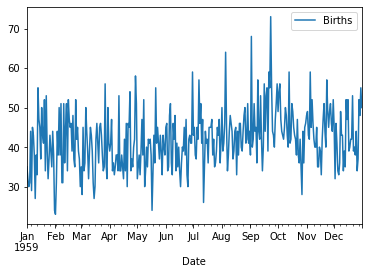

In [6]:
birthDF.plot()
plt.show()

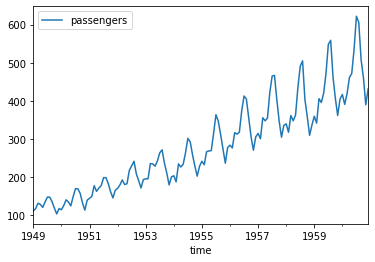

In [7]:
airDF.plot()
plt.show()

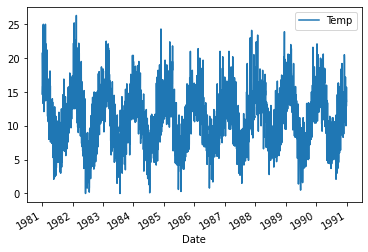

In [8]:
tempDF.plot()
plt.show()

### Stationary 
- birthDF 중간값까지의 평균과 분산

In [9]:
# birthDF 중간값까지의 평균과 분산
# Stationary 

n = int(len(birthDF)/2)
print(birthDF.iloc[:n].mean())
print(birthDF.iloc[n:].mean())
print(birthDF.iloc[:n].var())
print(birthDF.iloc[n:].var())

Births    39.763736
dtype: float64
Births    44.185792
dtype: float64
Births    49.485308
dtype: float64
Births    48.976281
dtype: float64


### Non-Stationary
- airDF 중간값까지의 평균과 분산


In [10]:
# airDF 중간값까지의 평균과 분산
# 값의 차이가 큰것으로 보아 Non-Stationary

n = int(len(airDF)/2)
print(airDF.iloc[:n].mean())
print(airDF.iloc[n:].mean())
print(airDF.iloc[:n].var())
print(airDF.iloc[n:].var())

passengers    182.902778
dtype: float64
passengers    377.694444
dtype: float64
passengers    2275.69464
dtype: float64
passengers    7471.736307
dtype: float64


### Stationary?
- 데이터가 주기성을 가지고 있음

In [11]:
# airDF 중간값까지의 평균과 분산
# 주기성을 가지고 있음

n = int(len(tempDF)/2)
print(tempDF.iloc[:n].mean())
print(tempDF.iloc[n:].mean())
print(tempDF.iloc[:n].var())
print(tempDF.iloc[n:].var())

Temp    11.043507
dtype: float64
Temp    11.312
dtype: float64
Temp    18.170782
dtype: float64
Temp    14.961956
dtype: float64


In [12]:
tempDF['days'] = range(0,len(tempDF))
tempDF

,Temp,days
Date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


In [15]:
# temp와 days의 상관관계
tempDF.corr()

,Temp,days
Temp,1.00000,0.01218
days,0.01218,1.00000


In [14]:
temps = tempDF['Temp'].values
days = tempDF['days'].values

In [16]:
np.corrcoef(temps, days)

array([[1.        , 0.01218004],
       [0.01218004, 1.        ]])

### lag1 하나를 쉬프트 시켜 자기 자신과 상관관계를 구함

In [25]:
print(temps)
print(temps[1:]) # 첫번째를 제외하고 가져옴
print(temps[:-1]) # 마지막을 제외하고 가져옴

[20.7 17.9 18.8 ... 13.5 15.7 13. ]
[17.9 18.8 14.6 ... 13.5 15.7 13. ]
[20.7 17.9 18.8 ... 13.6 13.5 15.7]


In [26]:
# lag1 하나를 쉬프트 시켜 자기 자신과 상관관계를 구함
np.corrcoef([temps[1:],temps[:-1]])

array([[1.        , 0.77487022],
       [0.77487022, 1.        ]])

### lag2 하나를 쉬프트 시켜 자기 자신과 상관관계를 구함

In [27]:
print(temps)
print(temps[2:]) # 첫번째를 제외하고 가져옴
print(temps[:-2]) # 마지막을 제외하고 가져옴

[20.7 17.9 18.8 ... 13.5 15.7 13. ]
[18.8 14.6 15.8 ... 13.5 15.7 13. ]
[20.7 17.9 18.8 ... 14.  13.6 13.5]


In [22]:
np.corrcoef([temps[2:],temps[:-2]])

array([[1.        , 0.63111946],
       [0.63111946, 1.        ]])

In [28]:
# 반복문을 이용하여 확인
autocorrelation=[]
for shift in range(1,10):
    c = np.corrcoef(temps[:-shift], temps[shift:] )[0,1]
    autocorrelation.append( c )
autocorrelation


[0.7748702165384455,
 0.6311194620684837,
 0.5863748620126277,
 0.5788976133377622,
 0.5785715744112058,
 0.5765484145122558,
 0.5759289535831575,
 0.5695569780397493,
 0.5634747178408283]

In [29]:
# 위의 반복문을 함수로 제공
from statsmodels.graphics.tsaplots import plot_acf, acf

In [32]:
# acf (autocorrelation)

result = acf(tempDF['Temp'])
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092, 0.43378232, 0.4203594 , 0.42707505, 0.42196486,
       0.4079607 ])

[]

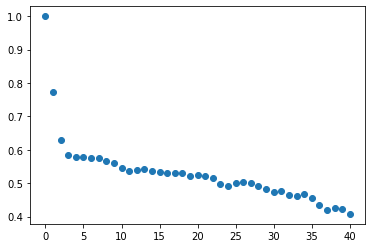

In [34]:
plt.scatter(range(0,len(result)), result)
plt.plot()

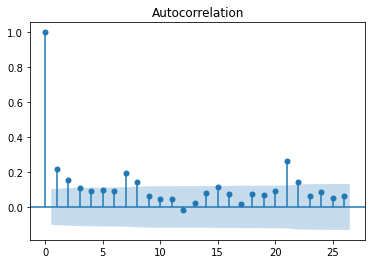

In [37]:
# Stationary 경우
plot_acf(birthDF['Births'])
plt.show()

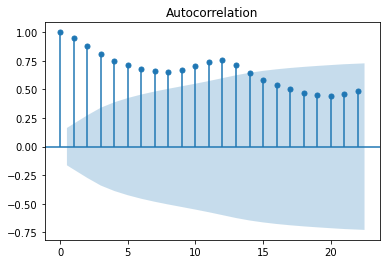

In [39]:
# Non-Stationary 경우
plot_acf(airDF['passengers'])
plt.show()

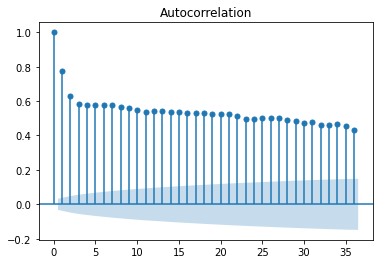

In [40]:
# 떨어지는 것으로 보아 Non-Stationary

plot_acf(tempDF['Temp'])
plt.show()

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

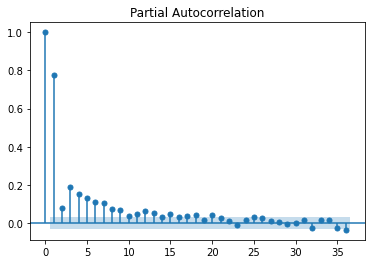

In [42]:
# 그래프를 보고 모델을 선택할때 도움을 줌

plot_pacf(tempDF['Temp'])
plt.show()

### Stationary와 Non-Stationary를 판단
- adfuller 판단지표

### 검증조건
- 귀무가설 : Non-Stationary
- 대체가설 : Stationary

In [43]:
from statsmodels.tsa.stattools import adfuller

In [53]:
result1 = adfuller(birthDF['Births'])
print(result1[0]) # adf값 (값이 작을수록 : 귀무가설을 기각시킬 확룔이 높다.)
print(result1[1]) # p-value 귀무가설 기각

-4.808291253559764
5.2434129901498554e-05


In [56]:
result2 = adfuller(airDF['passengers'])
print(result2[0]) # adf값  (값이 클수록 귀무가설 채택확률이 높다.)
print(result2[1]) # p-value (0.05보다 작으면 귀무가설 기각)

0.8153688792060512
0.991880243437641


In [57]:
result3 = adfuller(tempDF['Temp'])
print(result3[0])
print(result3[1])

-4.4448049246116925
0.000247082630036107


In [59]:
# AIC 값이 작을수록 정확도가 높아짐

order = (2,1,2) # lag2, ,lag2를 적용
model = ARIMA(airDF,order)
rfit_result = model.fit()
rfit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Wed, 27 Jan 2021   AIC                           1344.043
Time:                        11:19:34   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.passengers    -1.9098      0.065    -29.518      0.000      -2.037      -1.783
ma.L2.D.passengers     0.9997      0.068     14.809      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0002           -0.0479
MA.2            0.9552           +0.2964j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [64]:
rfit_result.aic

1344.0434032588578

In [60]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True) # AIC가 낮은값으로 정렬
    return result_df


In [66]:
arima_aic_check(airDF,(3,3,3)).head()

,order,AIC
21,p:2 d:1 q:2,1344.043403
20,p:2 d:1 q:1,1361.695810
13,p:1 d:1 q:2,1371.815374
15,p:1 d:2 q:2,1393.908442
23,p:2 d:2 q:2,1394.656208


In [73]:
# 예측 통계값
rfit_result.predict(1,10,typ ='levels')

1949-02-01    114.531094
1949-03-01    121.350894
1949-04-01    137.221341
1949-05-01    129.789528
1949-06-01    119.169414
1949-07-01    136.762406
1949-08-01    149.739079
1949-09-01    147.367312
1949-10-01    134.798626
1949-11-01    121.076946
Freq: MS, dtype: float64

In [88]:
# 예측 통계값
preds = rfit_result.predict('1960-07-01','1960-12-01',typ ='levels')

In [82]:
train = airDF[:'1960-07-01']
test  = airDF['1960-07-01':]

In [97]:
## 앞선 7개월을 예측
preds = rfit_result.predict('1960-07-01','1961-07-01',typ ='levels')

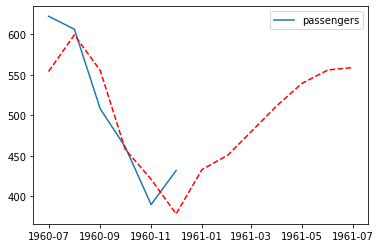

In [98]:
plt.plot(test)
plt.plot(preds,'r--') # 빨간 부분이 미래 예측값
plt.legend(test)
plt.show()

## 연습문제
- acf, adfuller, 예측 (2001-11-13, 2001-11-20) 

In [101]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
df = pd.DataFrame(df)
df


,count
date,
2001-11-01,0.998543
2001-11-02,1.914526
2001-11-03,3.057407
2001-11-04,4.044301
2001-11-05,4.952441
2001-11-06,6.002932
2001-11-07,6.930134
2001-11-08,8.011137
2001-11-09,9.040393


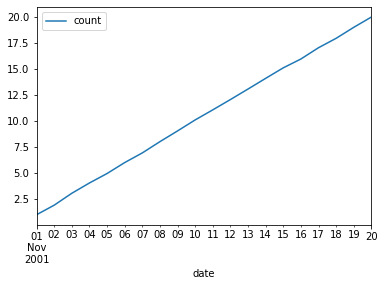

In [102]:
df.plot()
plt.show()

In [103]:
# birthDF 중간값까지의 평균과 분산
# Stationary 

n = int(len(df)/2)
print(df.iloc[:n].mean())
print(df.iloc[n:].mean())
print(df.iloc[:n].var())
print(df.iloc[n:].var())

count    5.504882
dtype: float64
count    15.521921
dtype: float64
count    9.308281
dtype: float64
count    8.915356
dtype: float64


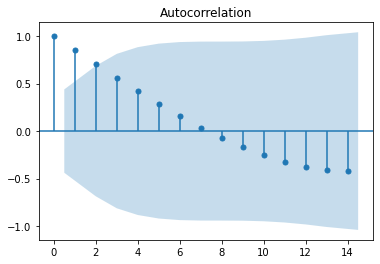

In [104]:
# Stationary 경우
plot_acf(df['count'])
plt.show()

In [105]:
# 귀무가설 : Non-Stationary
# 대체가설 : Stationary

result1 = adfuller(df['count'])
print(result1[0]) # adf값 (값이 작을수록 : 귀무가설을 기각시킬 확룔이 높다.)
print(result1[1]) # p-value < 0.05 귀무가설 채택

-7.573269903544496
2.804546459120648e-11


In [106]:
# AIC 값이 작을수록 정확도가 높아짐

order = (2,1,2) # lag2, ,lag2를 적용
model = ARIMA(df,order)
rfit_result = model.fit()
rfit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                   19
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  25.395
Method:                       css-mle   S.D. of innovations              0.059
Date:                Wed, 27 Jan 2021   AIC                            -38.790
Time:                        11:48:54   BIC                            -33.123
Sample:                    11-02-2001   HQIC                           -37.831
                         - 11-20-2001                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0001      0.014     73.731      0.000       0.973       1.027
ar.L1.D.count    -0.3971      0.295     -1.346      0.178      -0.975       0.181
ar.L2.D.count    -0.6571      0.230     -2.851      0.004      -1.109      -0.205
ma.L1.D.count     0.0892      0.208      0.429      0.668      -0.318       0.496
ma.L2.D.count     1.0000      0.640      1.563      0.118      -0.254       2.254
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3022           -1.1961j            1.2336           -0.2894
AR.2           -0.3022           +1.1961j            1.2336            0.2894
MA.1           -0.0446           -0.9990j            1.0000           -0.2571
MA.2           -0.0446           +0.9990j            1.0000            0.2571
-----------------------------------------------------------------------------
"""

In [108]:
rfit_result.aic

-38.78964469867375

In [109]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True) # AIC가 낮은값으로 정렬
    return result_df

In [110]:
# 예측 통계값
preds = rfit_result.predict('2001-11-13','2001-11-20',typ ='levels')

In [116]:
train = df[:'2001-11-13']
test  = df['2001-11-13':]

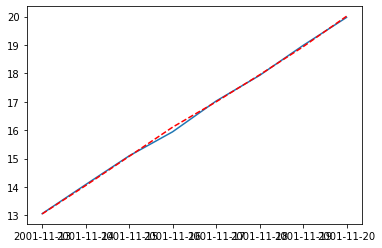

In [117]:
plt.plot(test)
plt.plot(preds,'r--') # 빨간 부분이 미래 예측값
plt.show()

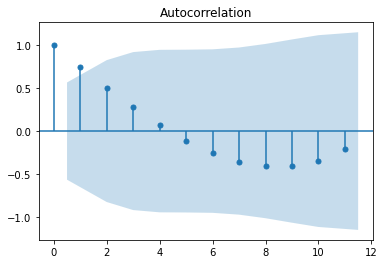

-0.2727060313249751
0.9292820059517101


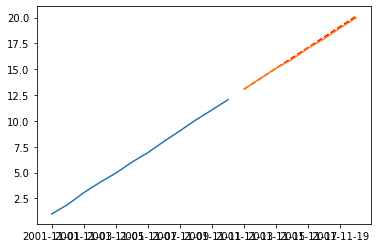

In [118]:
# 2011-11-13 기준으로 train, test 나누기
train=df[:'2001-11-12']
test=df['2001-11-13':]

# acf로 non-stationary 여부 확인
plot_acf(train['count'])
plt.show() # non-stationary

# adfuller로 non-stationary 여부 확인
result=adfuller(train['count'])
print(result[0])
print(result[1]) # p-value 값 0.93 -> 귀무가설 채택 -> non-stationary

# 가장 작은 AIC 만드는 ARIMA 조합 찾기
arima_aic_check(train, [3,3,3]) # 0, 1, 1 선택

# ARIMA 모델 학습
order=(0,1,1)
model=ARIMA(train, order)
model.fit()

# 예측 및 그래프로 나타내기
pred=model.fit().predict('2001-11-13', '2001-11-20', typ="levels")

plt.plot(train) 
plt.plot(pred, 'r--') # 실제 데이터(test)와 거의 일치
plt.plot(test)
plt.show()
